In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like:")
situation = maze.reset()
print(situation)
maze.render()


This is how maze looks like:
['O', 'O', '.', '.', '.', '.', '.', 'O']

□ X □ □ □
□ □ □ □ □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [3]:
from lcs.agents.xncs import XNCS, Configuration
from utils.nxcs_utils import *


In [4]:
cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    mutation_chance=0.08,
                    chi=0.8,
                    ga_threshold=25,
                    deletion_threshold=25,
                    delta=0.1,
                    initial_error=0.01,
                    epsilon_0=0.01,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance = 0.9,
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=200
                   )


In [5]:
agent = XNCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)
explore_population, exploit_metrics = agent.exploit(maze, 1000)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 27, 'reward': 1000.0, 'perf_time': 0.020669199999999943, 'numerosity': 90, 'population': 90, 'average_specificity': 2.466666666666667, 'fraction_accuracy': 1.0}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 2, 'reward': 1504.1706685827796, 'perf_time': 0.014677700000000016, 'numerosity': 1354, 'population': 772, 'average_specificity': 15.059084194977844, 'fraction_accuracy': 0.85}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 1, 'reward': 1716.2526581377579, 'perf_time': 0.015619799999999628, 'numerosity': 1800, 'population': 1125, 'average_specificity': 15.297777777777778, 'fraction_accuracy': 0.92}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 7, 'reward': 1107.364234798143, 'perf_time': 0.09510359999999807, 'numerosity': 1800, 'population': 1182, 'average_specificity': 15.864444444444445, 'fraction_accuracy': 0.8}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 3, 'reward': 1374.3206969364635, 'pe

In [6]:
for cl in explore_population:
        print(str(cl))

Cond:#..#.O#. - Act:6 - effect:....OOO. - Num:5 [fit: 0.047, exp: 484.00, pred: 1309.630, error:301.0095151762131]acc: 0.9090909090909091
Cond:..#..O.. - Act:2 - effect:OOFOO... - Num:1 [fit: 0.010, exp: 0.00, pred: 402.488, error:0.0]acc: None
Cond:.##..O.# - Act:2 - effect:.O...F.. - Num:1 [fit: 0.005, exp: 0.00, pred: 1130.801, error:0.0]acc: None
Cond:..O#.OF. - Act:3 - effect:O....... - Num:1 [fit: 0.010, exp: 0.00, pred: 1020.921, error:0.0]acc: None
Cond:#..#.#O. - Act:6 - effect:........ - Num:1 [fit: 0.051, exp: 0.00, pred: 889.235, error:235.93792823062267]acc: None
Cond:.....O#. - Act:6 - effect:....OOO. - Num:5 [fit: 0.045, exp: 464.00, pred: 1309.630, error:301.0095151762131]acc: 1.0
Cond:##.F.O.. - Act:1 - effect:...FOO.. - Num:1 [fit: 0.024, exp: 0.00, pred: 1300.910, error:594.4919059325924]acc: None
Cond:.#.F.O.. - Act:1 - effect:...FOO.. - Num:1 [fit: 0.024, exp: 0.00, pred: 1300.910, error:594.4919059325924]acc: None
Cond:.#.#.#O. - Act:6 - effect:........ - Num:1 [f

In [7]:
print("Most Numerous rules:")
for action in range(agent.cfg.number_of_actions):
    action_set = agent.population.generate_action_set(action)
    most_numerous = action_set[0]
    for cl in action_set:
        if cl.numerosity > most_numerous.numerosity:
            most_numerous = cl
    print(most_numerous)

Most Numerous rules:
Cond:#.###.#O - Act:0 - effect:.....OOF - Num:5 [fit: 0.040, exp: 13.00, pred: 909.376, error:3837.661342836094]acc: 0.3076923076923077
Cond:##.#OO#. - Act:1 - effect:....OOO. - Num:4 [fit: 0.022, exp: 16.00, pred: 1125.296, error:4045.18246462395]acc: 0.0
Cond:###.F##. - Act:2 - effect:....OOO. - Num:6 [fit: 0.344, exp: 150.00, pred: 2122.975, error:224.5084546745183]acc: 0.9066666666666666
Cond:##.#OO#. - Act:3 - effect:....OOO. - Num:9 [fit: 0.188, exp: 192.00, pred: 1105.491, error:158.3848377652093]acc: 1.0
Cond:#O.#.### - Act:4 - effect:OO...... - Num:4 [fit: 0.001, exp: 19.00, pred: 825.848, error:5063.364127774808]acc: 0.15789473684210525
Cond:#.OO#### - Act:5 - effect:....OOO. - Num:10 [fit: 0.514, exp: 158.00, pred: 2237.917, error:297.4169431603479]acc: 0.9873417721518988
Cond:#....O#. - Act:6 - effect:....OOO. - Num:11 [fit: 0.101, exp: 443.00, pred: 1309.630, error:301.0095151762131]acc: 1.0
Cond:#...F#.# - Act:7 - effect:...OO... - Num:9 [fit: 0.103, 

In [15]:
print("The most numerous rules:")
numerous =  sorted(agent.population, key=lambda cl: -1*cl.numerosity)[0:10]
for cl in numerous:
    print(cl)

The most numerous rules:
Cond:#....O#. - Act:6 - effect:....OOO. - Num:11 [fit: 0.101, exp: 443.00, pred: 1309.630, error:301.0095151762131]acc: 1.0
Cond:#.OO#### - Act:5 - effect:....OOO. - Num:10 [fit: 0.514, exp: 158.00, pred: 2237.917, error:297.4169431603479]acc: 0.9873417721518988
Cond:##.#OO#. - Act:3 - effect:....OOO. - Num:9 [fit: 0.188, exp: 192.00, pred: 1105.491, error:158.3848377652093]acc: 1.0
Cond:#...F#.# - Act:7 - effect:...OO... - Num:9 [fit: 0.103, exp: 23.00, pred: 1034.493, error:4867.738624074384]acc: 0.4782608695652174
Cond:#....OO. - Act:6 - effect:....OOO. - Num:8 [fit: 0.127, exp: 0.00, pred: 1224.646, error:60.5299079420778]acc: None
Cond:#....O## - Act:6 - effect:....OOO. - Num:8 [fit: 0.072, exp: 206.00, pred: 1309.630, error:301.01333544763446]acc: 0.7815533980582524
Cond:#.##.OOF - Act:7 - effect:....OOO. - Num:6 [fit: 0.116, exp: 488.00, pred: 1948.419, error:251.07661682020802]acc: 1.0
Cond:###.F##. - Act:2 - effect:....OOO. - Num:6 [fit: 0.344, exp: 15

In [16]:
print("The fittest rules:")
fittest =  sorted(agent.population, key=lambda cl: -1 * cl.fitness)[0:10]
for cl in fittest:
    print(cl)

The fittest rules:
Cond:.#...OO. - Act:6 - effect:....OOO. - Num:2 [fit: 2.487, exp: 0.00, pred: 1061.278, error:93.57621525097161]acc: None
Cond:..#.F..# - Act:3 - effect:...FOO.. - Num:1 [fit: 2.195, exp: 0.00, pred: 2106.470, error:175.87720446349576]acc: None
Cond:#.#.OO#. - Act:3 - effect:....OOO. - Num:2 [fit: 1.712, exp: 0.00, pred: 1069.779, error:59.62231876636257]acc: None
Cond:##...O#. - Act:2 - effect:.....OOF - Num:5 [fit: 1.230, exp: 52.00, pred: 2208.265, error:255.38892135914688]acc: 0.5961538461538461
Cond:##.#OOO. - Act:5 - effect:....OOO. - Num:1 [fit: 1.096, exp: 0.00, pred: 1059.072, error:103.34728876970632]acc: None
Cond:#...#O.# - Act:1 - effect:....FO.. - Num:3 [fit: 1.096, exp: 10.00, pred: 984.570, error:2782.167280691241]acc: 0.9
Cond:.#...O.# - Act:5 - effect:....OOO. - Num:1 [fit: 1.040, exp: 0.00, pred: 1053.225, error:158.74627568588951]acc: None
Cond:..##.FO. - Act:5 - effect:....OOO. - Num:2 [fit: 0.983, exp: 0.00, pred: 1033.312, error:13.311852830669

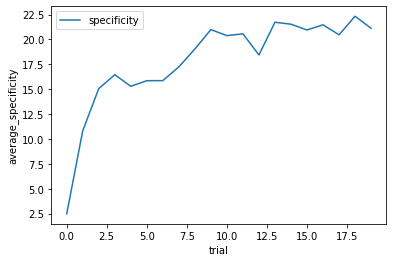

In [10]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["average_specificity"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])

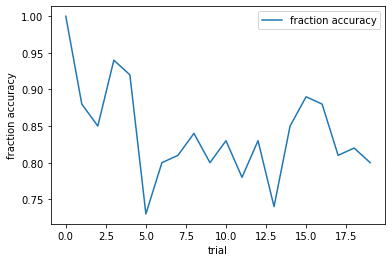

In [11]:
df = pd.DataFrame(metric["fraction_accuracy"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])

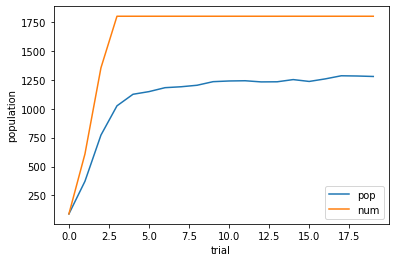

In [12]:
df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []

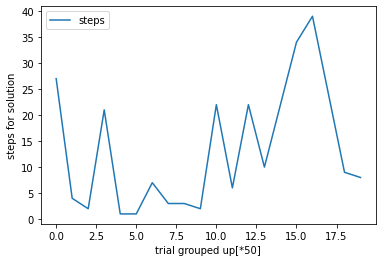

In [13]:
xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
# df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
